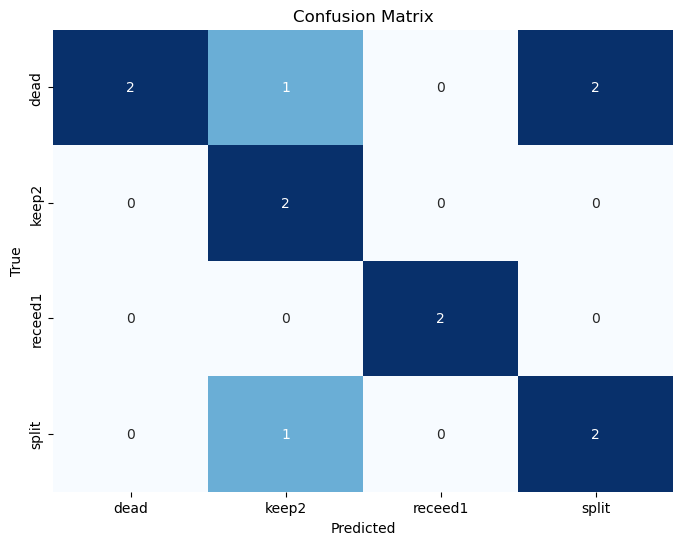

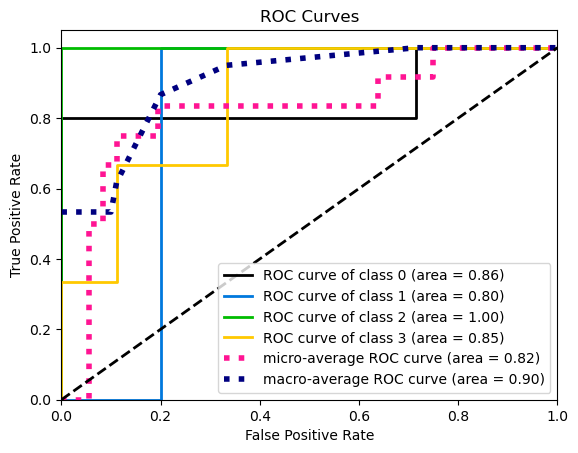

<Figure size 800x600 with 0 Axes>

Cross-Validation Scores: [0.8        0.77777778 0.44444444 0.55555556 0.77777778]
Mean CV Accuracy: 0.671111111111111
Test Set Accuracy: 0.6666666666666666


In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_sample_weight

# Load data from a CSV file
data = pd.read_csv("C:/Users/Laurent/Documents/organoids-project/notebooks/statistics_features.csv")

# Assuming the last column is the label and the rest are features
X = data.iloc[:, 2:]
y = data.iloc[:, 1]
# Use a list for labels to ensure consistent order
unique_labels = []
seen = set()

for item in y.values:
    if item not in seen:
        unique_labels.append(item)
        seen.add(item)
        
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weights to account for imbalance
class_weights = len(y) / (4 * np.bincount(y))

# Initialize the XGBoost classifier for multiclass classification
classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=4)

# Perform cross-validation with stratified sampling
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(classifier, X_train, y_train, cv=cv, scoring='accuracy')

# Train the model on the entire training set
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train  # provide your own target name
)

classifier.fit(X_train, y_train, sample_weight=sample_weights)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix with custom labels
plt.figure(figsize=(8, 6))
# Specify your custom labels for both rows and columns
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
y_prob = classifier.predict_proba(X_test)
# Your code was missing the plot for ROC curve
skplt.metrics.plot_roc(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

# Create ROC curve plot
plt.figure(figsize=(8, 6))
plt.show()

# Print cross-validation scores and accuracy
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Test Set Accuracy:", accuracy)


In [68]:
import cv2
import os
import matplotlib.pyplot as plt

def show_missclassified_samples(image_dir, samples, title):
    num_misclassified = len(samples)
    
    # Define the number of rows and columns for subplots
    num_rows = 2
    num_cols = num_misclassified  # +1 to ensure at least 2 columns
    
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6))
    
    for i, misclassified_sample in enumerate(samples):
        folder_name, sample_name = misclassified_sample.split(' - ')

        # Load the original image
        image_path = os.path.join(image_dir, folder_name, sample_name)
        image = cv2.imread(image_path)
        if num_misclassified == 1:
            ax = axs[0]
        else:
            ax = axs[0, i % num_cols]  # Use modulo to handle multiple rows
        ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax.set_title(sample_name)
        ax.axis('off')

        # Load the labeled image (if named as "labeled_sample_name")
        labeled_sample_name = "labeled_" + sample_name
        image_path_labeled = os.path.join(image_dir, folder_name, labeled_sample_name)
        labeled_image = cv2.imread(image_path_labeled)
        if num_misclassified == 1:
            ax = axs[1]
        else:
            ax = axs[1, i % num_cols]  # Use modulo to handle multiple rows
        ax.imshow(cv2.cvtColor(labeled_image, cv2.COLOR_BGR2RGB))
        ax.set_title(labeled_sample_name)
        ax.axis('off')
    
    plt.title(title)
    plt.tight_layout()
    plt.show()


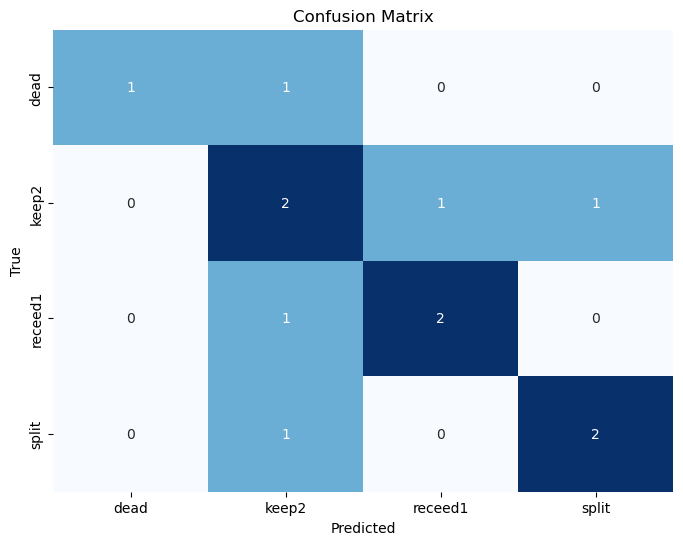

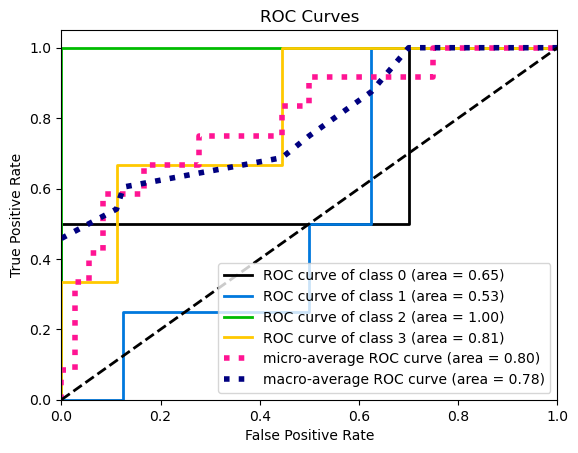

<Figure size 800x600 with 0 Axes>

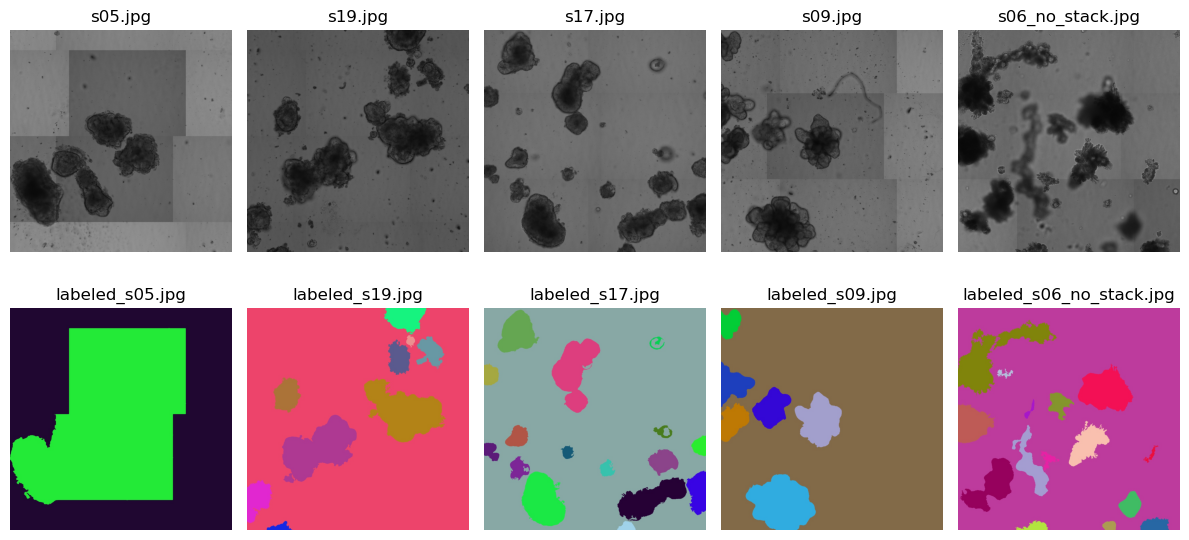

Misclassified Samples (Random State: 1):
48            split - s05.jpg
35            keep2 - s19.jpg
39          receed1 - s17.jpg
34            keep2 - s09.jpg
3     dead - s06_no_stack.jpg
dtype: object
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
Test Set Accuracy (using best model): 0.5833333333333334


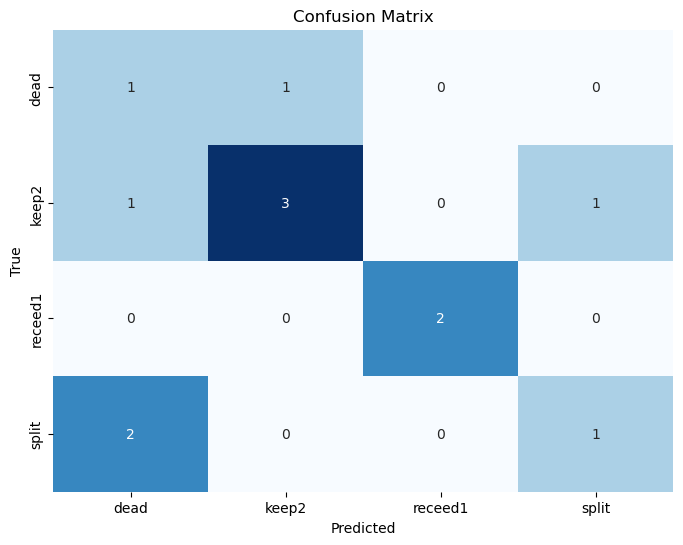

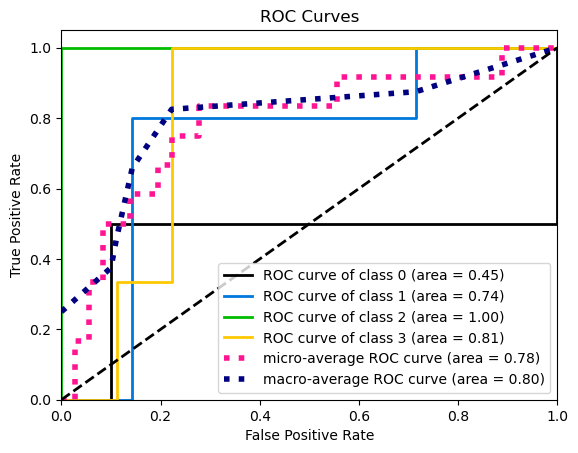

<Figure size 800x600 with 0 Axes>

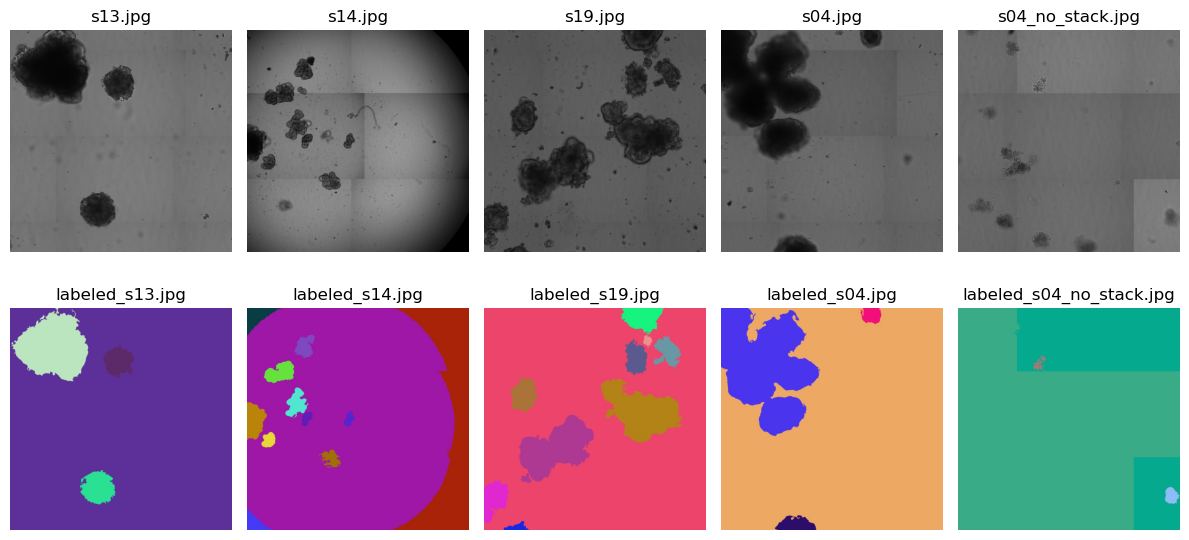

Misclassified Samples (Random State: 2):
55            split - s13.jpg
29            keep2 - s14.jpg
35            keep2 - s19.jpg
47            split - s04.jpg
0     dead - s04_no_stack.jpg
dtype: object
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Test Set Accuracy (using best model): 0.5833333333333334


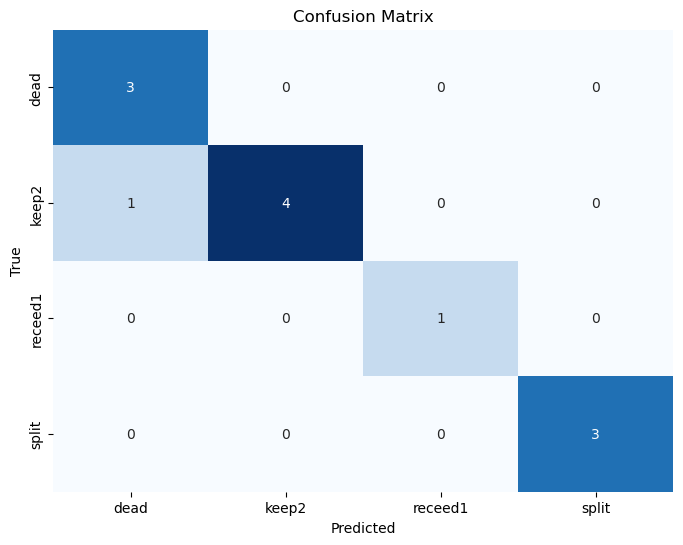

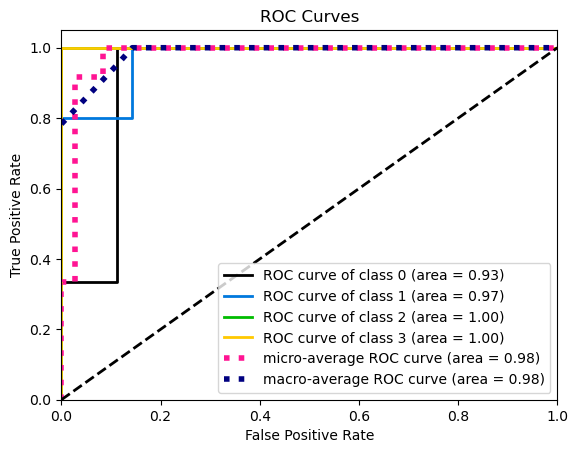

<Figure size 800x600 with 0 Axes>

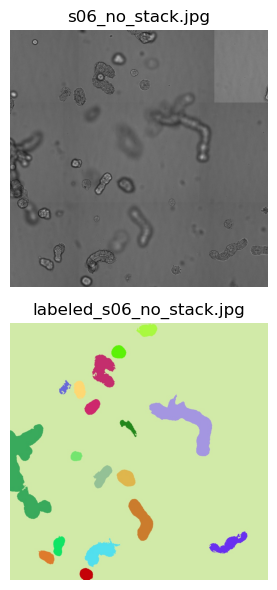

Misclassified Samples (Random State: 3):
18    keep2 - s06_no_stack.jpg
dtype: object
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100, 'subsample': 1.0}
Test Set Accuracy (using best model): 0.9166666666666666


In [69]:
# Import necessary libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_sample_weight

# Load data from a CSV file
data = pd.read_csv("C:/Users/Laurent/Documents/organoids-project/notebooks/statistics_features.csv")
# Assuming the last column is the label and the rest are features
X = data.iloc[:, 2:]
y = data.iloc[:, 1]
# Use a list for labels to ensure consistent order
unique_labels = []
seen = set()

for item in y.values:
    if item not in seen:
        unique_labels.append(item)
        seen.add(item)
        
# Extract unique labels and create a mapping from labels to integers
unique_labels = y.unique()
label_mapping = {label: i for i, label in enumerate(unique_labels)}

# Create a new Series for y with custom labels and the original indexes
y = y.map(label_mapping)

# Specify different random states
random_states = [1, 2, 3]  # Add more random states if needed

for random_state in random_states:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    # Calculate class weights to account for imbalance
    class_weights = len(y) / (4 * np.bincount(y))

    # Initialize the XGBoost classifier for multiclass classification
    classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=4)

    # Perform cross-validation with stratified sampling
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    param_grid = {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5],
        'subsample': [0.8, 0.9, 1.0],
    }

    # Create a GridSearchCV instance
    grid_search = GridSearchCV(
        estimator=classifier,
        param_grid=param_grid,
        scoring='accuracy',
        cv=cv,  # You can adjust the number of cross-validation folds
        n_jobs=-1  # Use all available CPU cores
    )

    # Train the model on the entire training set
    sample_weights = compute_sample_weight(
        class_weight='balanced',
        y=y_train  # provide your own target name
    )

    # Fit the GridSearchCV instance on the training data
    grid_search.fit(X_train, y_train, sample_weight=sample_weights)

    # Get the best parameters and best estimator from the grid search
    best_params = grid_search.best_params_
    best_classifier = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = grid_search.predict(X_test)

    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)

    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap for the confusion matrix with custom labels
    plt.figure(figsize=(8, 6))
    # Specify your custom labels for both rows and columns
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=unique_labels, yticklabels=unique_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate ROC curve and AUC
    y_prob = grid_search.predict_proba(X_test)
    # Your code was missing the plot for ROC curve
    skplt.metrics.plot_roc(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

    # Create ROC curve plot
    plt.figure(figsize=(8, 6))
    plt.show()

    # Retrieve the names of the misclassified samples
    wellclassified_indices = np.where(y_test == y_pred)[0]
    wellclassified_samples = data.iloc[y_test.index[wellclassified_indices], 1] + ' - ' + data.iloc[y_test.index[wellclassified_indices], 0]
    show_samples(r"D:\data_for_seg\z_projection", samples=misclassified_samples)

    misclassified_indices = np.where(y_test != y_pred)[0]
    misclassified_samples = misclassified_samples = data.iloc[y_test.index[misclassified_indices], 1] + ' - ' + data.iloc[y_test.index[misclassified_indices], 0]
    show_samples(r"D:\data_for_seg\z_projection", samples=misclassified_samples)
    
    # Print the names of misclassified samples
    print("Misclassified Samples (Random State: {}):".format(random_state))
    print(misclassified_samples)

    # Print the best hyperparameters and test accuracy
    print("Best Hyperparameters:", best_params)
    print("Test Set Accuracy (using best model):", accuracy)
